/opt/conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


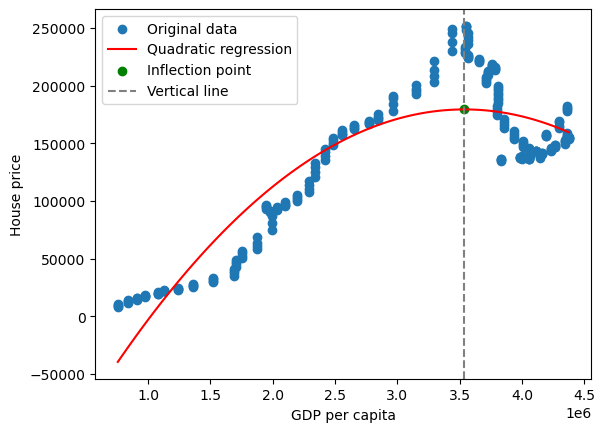

Inflection point coordinates: (3537582.50, 179279.24)


In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

file_path = "./data/final2.csv"
df = pd.read_csv(file_path)

X = df[['GDP per capita (current US$)']]
y = df['House price']

# Use PolynomialFeatures to transform feature X into quadratic terms
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Generate smooth X values for plotting
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_pred = model.predict(X_smooth_poly)

# Calculate the second derivative of the quadratic equation
coefs = model.coef_
second_derivative = 2 * coefs[2]

# Find the x-coordinate of the maximum second derivative (inflection point)
inflection_x = -coefs[1] / (2 * coefs[2])

# Calculate the corresponding y-coordinate using the regression equation
inflection_y = model.predict(poly.transform([[inflection_x]]))

# Plot original data, quadratic regression curve, and the inflection point with a vertical line
plt.scatter(X, y, label='Original data')
plt.plot(X_smooth, y_pred, color='red', label='Quadratic regression')
plt.scatter(inflection_x, inflection_y, color='green', label='Inflection point')
plt.axvline(x=inflection_x, color='gray', linestyle='--', label='Vertical line')
plt.xlabel('GDP per capita')
plt.ylabel('House price')
plt.legend()
plt.show()

# Print the inflection point's coordinates
print("Inflection point coordinates: ({:.2f}, {:.2f})".format(inflection_x, inflection_y[0]))
